Import packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

import xarray as xr
import matplotlib.ticker as mticker
from matplotlib import colors as c
import geopandas
from shapely.geometry import Point, Polygon
import regionmask
import descartes
import re

Import shapefiles from local folder

In [2]:
dirl_shape  = "nedbørsfeltNVE/NVE_shape/NVEData/Hydrologi/"
files = os.listdir(dirl_shape)
files = np.sort(files)
files_txt = [i for i in files if i.endswith('.shx')]
print(files_txt)

myfile = dirl_shape+files_txt[0]
import geopandas as gpd
shapefile = gpd.read_file(myfile)
print(shapefile.iloc[0])
#shapefile.plot() 

['Hydrologi_TotalNedborfeltMalestasjon.shx']
objType                                   NedbørfeltMålestasjon
feltNr                                                     1902
stSamletID                                         016000001000
stID                                                    160.1.0
stNavn                                             Storglåmvatn
areal_km2                                                251.85
Q6190Mm3Aa                                               797.15
Q6190mmAar                                              3165.18
Q6190lskm2                                               100.32
vf6190m3s                                                 25.27
uttakDato                                            2021-09-23
ekspType                               NVEs nedlastningsløsning
geometry      POLYGON Z ((14.35082813994262 66.7934058783317...
Name: 0, dtype: object


Test if ok

In [3]:
print(shapefile.iloc[0])

objType                                   NedbørfeltMålestasjon
feltNr                                                     1902
stSamletID                                         016000001000
stID                                                    160.1.0
stNavn                                             Storglåmvatn
areal_km2                                                251.85
Q6190Mm3Aa                                               797.15
Q6190mmAar                                              3165.18
Q6190lskm2                                               100.32
vf6190m3s                                                 25.27
uttakDato                                            2021-09-23
ekspType                               NVEs nedlastningsløsning
geometry      POLYGON Z ((14.35082813994262 66.7934058783317...
Name: 0, dtype: object


Make list of catchments

In [4]:
dirl  = "Final_dataset/"
files = os.listdir(dirl)
files = np.sort(files)
files_txt = [i for i in files if i.endswith('.txt_')]

files_txt = [i[:-5] for i in files if i.endswith('.txt_')]
files_txt.sort(key=int)
files_txt
len(files_txt)

124

Using list of catchments from file names, renaming to fit actual catchment names

In [7]:
new_list = []
for i in files_txt:
    new_list.append(i[0:-5]+'.'+i[-5:])
re_zero = r"[0]{2,4}"
removed_zeros = []
for i in new_list:
    j = i+".0"
    removed_zeros.append(re.sub(re_zero, "", j))
removed_zeros.append('200.4.0')
removed_zeros.remove('2.4.0')
print(
    removed_zeros
)
my_st = removed_zeros

len(my_st)

['2.13.0', '2.32.0', '2.142.0', '2.268.0', '2.279.0', '2.284.0', '2.290.0', '2.303.0', '2.323.0', '6.10.0', '12.70.0', '12.171.0', '12.178.0', '12.193.0', '15.49.0', '16.66.0', '16.75.0', '18.10.0', '18.11.0', '19.79.0', '19.80.0', '19.82.0', '19.96.0', '19.104.0', '20.2.0', '20.11.0', '22.16.0', '24.8.0', '24.9.0', '25.24.0', '26.20.0', '26.21.0', '36.13.0', '41.1.0', '41.8.0', '42.2.0', '48.5.0', '50.1.0', '50.13.0', '55.4.0', '62.5.0', '62.10.0', '62.14.0', '62.15.0', '75.23.0', '75.28.0', '76.5.0', '78.8.0', '79.3.0', '80.4.0', '81.1.0', '82.4.0', '83.2.0', '83.6.0', '83.7.0', '83.12.0', '84.11.0', '84.20.0', '85.4.0', '86.10.0', '86.12.0', '87.10.0', '88.4.0', '88.11.0', '91.2.0', '97.1.0', '98.4.0', '101.1.0', '104.22.0', '104.23.0', '105.1.0', '109.9.0', '112.8.0', '122.11.0', '123.31.0', '124.2.0', '127.6.0', '127.11.0', '127.13.0', '128.5.0', '133.7.0', '138.1.0', '139.20.0', '139.26.0', '139.35.0', '140.2.0', '148.2.0', '151.15.0', '152.4.0', '153.1.0', '156.8.0', '156.10.0',

124

Chck if all catchments are included

In [8]:
selected_stations = files_txt
nf = shapefile
nf_selected = nf[nf.stID.isin(my_st)]
nf_selected = nf_selected.reset_index()
st_names = nf_selected.stID
st_names.head(30)

0      209.4.0
1      172.7.0
2      178.1.0
3      185.1.0
4      246.9.0
5      213.4.0
6      213.2.0
7      208.2.0
8      140.2.0
9     139.26.0
10    139.20.0
11     128.5.0
12     127.6.0
13     101.1.0
14     86.10.0
15     84.20.0
16      83.7.0
17      83.6.0
18     83.12.0
19      81.1.0
20    19.104.0
21     19.96.0
22     19.82.0
23     19.80.0
24     19.79.0
25     18.11.0
26     153.1.0
27     36.13.0
28    104.22.0
29     168.3.0
Name: stID, dtype: object

Plot catchments to see if correctly donne

<AxesSubplot:>

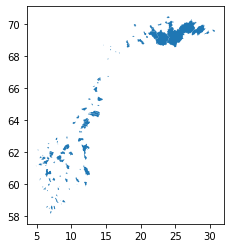

In [9]:
nf_selected.plot()

#nf_selected.iloc[[122]].plot()

Make regions with regionmask

In [10]:
st_regions = regionmask.from_geopandas(nf_selected, names='stID', name='catchment')